# Chapter 02

In [29]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

## 2M1

In [98]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

class Distribution:
    def __init__(self, prior=None):
        self.posterior = None
        if prior is None:
            self.grid_size = 20
            self.prior = self._standardize(np.ones(self.grid_size))
        else:
            self.grid_size = len(prior)
            self.prior = self._standardize(prior)
        self.grid = np.linspace(0,1, self.grid_size)
        self.tries = 0
        self.successes = 0
        
    def _standardize(self, dist):
        return dist / dist.sum()
        
    def update(self, successes, tries):
        likelihood = stats.binom.pmf(successes, tries, self.grid)
        if self.posterior is not None:
            self.prior = self.posterior
        self.posterior = self._standardize(self.prior * likelihood)
        self.tries = tries
        self.successes = successes
    
    def plot(self):
        fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
        ax1.plot(self.grid, self.prior, label='prior')
        ax1.set_title("Prior")
        if self.posterior is not None:
            ax2.plot(self.grid, self.posterior, label='posterior')
            ax2.set_title('Posterior ({:d} tries, {:d} successes)'.format(self.tries, self.successes))
        for x in (ax1, ax2):
            x.set_xlabel('true value of p')
            x.set_ylabel('posterior probability')
            x.legend()


In [99]:
def update_distribution(draws, keep_state=False, prior=None):
    d = Distribution(prior=prior)
    for draw in draws:    
        if not keep_state:
            d = Distribution(prior=prior)
        draw = np.asarray(draw)
        successes = draw.sum()
        tries = draw.size
        d.update(successes, tries)
        d.plot()

In [100]:
draws = [
    [1,1,1],
    [1,1,1,0],
    [0,1,1,0,1,1,1]
]

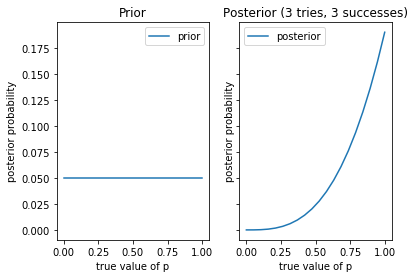

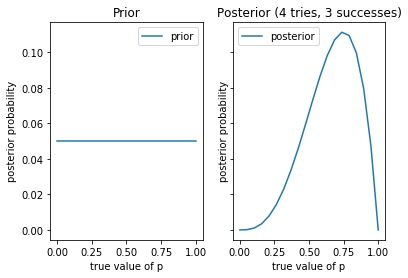

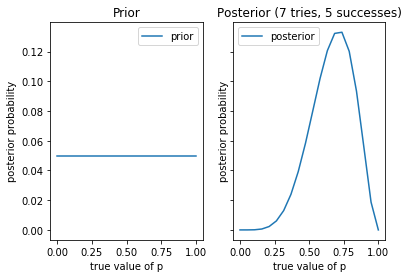

In [101]:
update_distribution(draws)

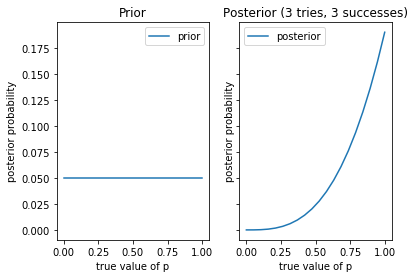

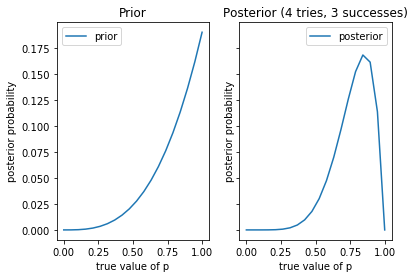

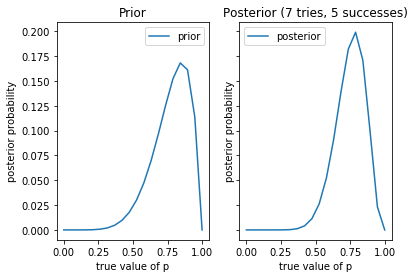

In [102]:
update_distribution(draws, keep_state=True)

## 2M2

In [103]:
log_prior = (np.linspace(0,1,20) >= 0.5).astype(int)

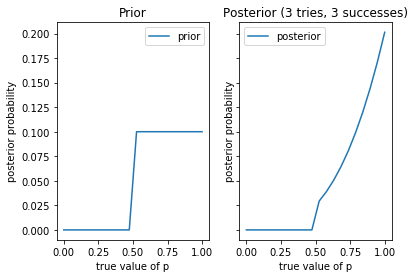

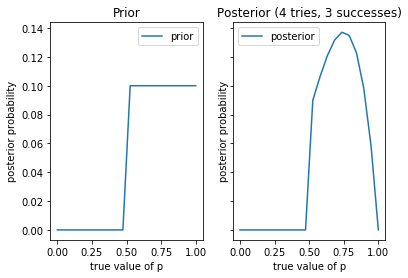

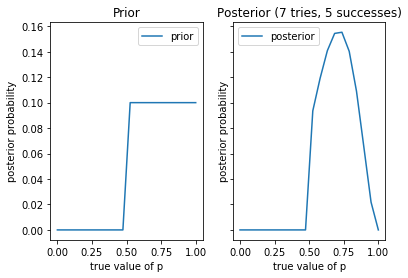

In [104]:
update_distribution(draws, prior=log_prior)

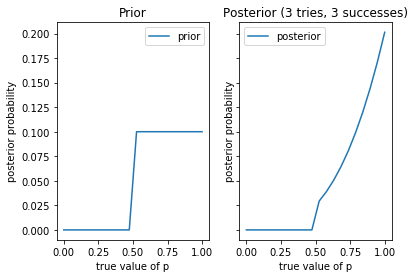

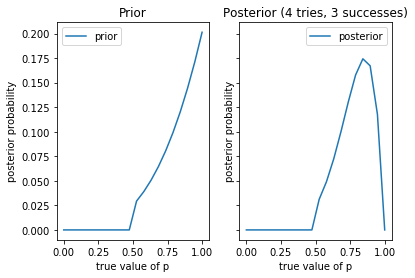

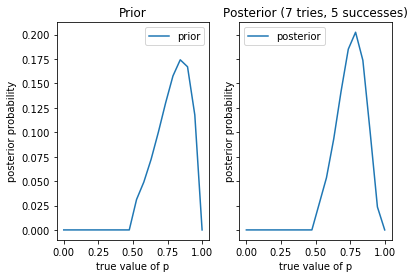

In [105]:
update_distribution(draws, prior=log_prior, keep_state=True)

**Q:** What if we update in one shot?

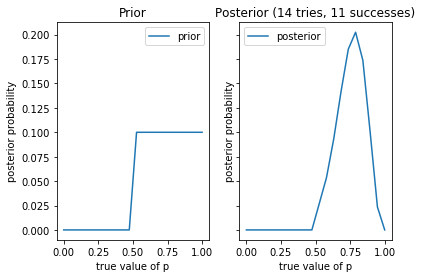

In [106]:
d = Distribution(prior = log_prior)
one_shot = np.asarray(sum(draws, []))
d.update(one_shot.sum(), one_shot.size)
d.plot()

**A:** The result is the same as partial updates!

## 2M3

Bayes Theorem: 
$
\begin{align}
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
\end{align}
$

For the excercise:
$
\begin{align}
P(Earth|land) = \frac{P(land|Earth) P(Earth)}{P(land)} \\
= \frac{P(0.3) P(0.5)}{P(\frac{0.3 + 1}{2})} \\
= \frac{0.15}{0.65} \\
= 0.23
\end{align}
$

**Q:** Does this also work with our distribution as we would expect?

[(0.7, 0.23076923076923078), (0, 0.76923076923076916)]


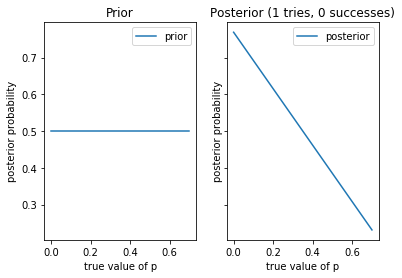

In [107]:
d = Distribution(prior=np.asarray([0.5,0.5]))
d.grid = [0.7, 0]
d.update(0,1)
d.plot()
print(list(zip(d.grid, d.posterior)))

**A:** Yes, the posterior probability for Earth (p(water)=0.7) is 0.23!

## 2H2

(Calculations are done on paper and not reprinted in LateX here)

The posterior probability that the specimen is of Species A is 33.33%.


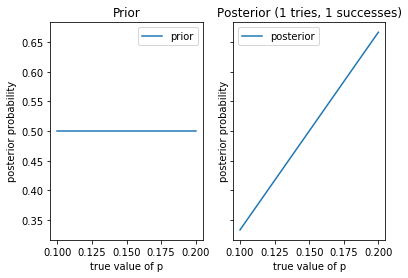

In [108]:
d = Distribution(prior=np.asarray([0.5,0.5]))
d.grid = [0.1, 0.2]
d.update(1,1)
d.plot()
print("The posterior probability that the specimen is of Species A is {:.2f}%.".format(d.posterior[0]*100))

# 2H3

(Calculations are done on paper and not reprinted in LateX here)

The posterior probability that the specimen is of Species A is 36.00%.


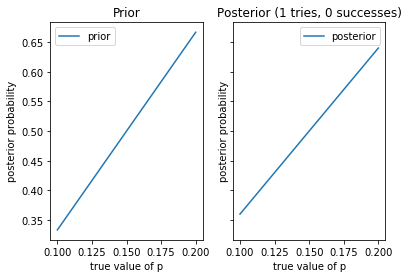

In [109]:
d = Distribution(prior=np.asarray([0.5,0.5]))
d.grid = [0.1, 0.2]
d.update(1,1)
d.update(0,1)  
d.plot()
print("The posterior probability that the specimen is of Species A is {:.2f}%.".format(d.posterior[0]*100))

## 2H4

(Calculations are done on paper and not reprinted in LateX here)

Without previous information:

$
P(Species = A\ |\ Test = A) = 16/23 \approx 0.06957
$

With previous information:

$
P(Species = A\ |\ Test = A, twins, single) = 0.5625
$